In [1]:
import xarray as xr
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.ticker as mticker
%matplotlib inline
from pprint import pprint
import os
from datetime import datetime
import calendar
import pandas as pd
from scipy import stats
import cartopy.crs as ccrs
import cartopy
import matplotlib.colors as colors
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

/home/sah002/.conda/envs/py3_analysis_sjh/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [100]:
!ls -ltr /home/sah002/repos/pam/SCM_PAM/SCM/soap_tests/*.nc

bl_nooc = xr.open_dataset('/home/sah002/repos/pam/SCMtests/cloudy_polluted_cont_out_noocem_bl.nc')
skp_nooc = xr.open_dataset('/home/sah002/repos/pam/SCMtests/cloudy_polluted_cont_out_noocem_skp.nc')

bl_oc = xr.open_dataset('/home/sah002/repos/pam/SCMtests/cloudy_polluted_cont_out_ocem_bl.nc')
skp_oc = xr.open_dataset('/home/sah002/repos/pam/SCMtests/cloudy_polluted_cont_out_ocem_skp.nc')


-rw-r--r-- 1 sah002 eccc_ccrn_shr 5468504 Mar 31 17:57 /home/sah002/repos/pam/SCM_PAM/SCM/soap_tests/cloudy_polluted_cont_out_noocem_bl.nc
-rw-r--r-- 1 sah002 eccc_ccrn_shr 5468504 Mar 31 18:07 /home/sah002/repos/pam/SCM_PAM/SCM/soap_tests/cloudy_polluted_cont_out_noocem_skp.nc
-rw-r--r-- 1 sah002 eccc_ccrn_shr 5468504 Mar 31 18:40 /home/sah002/repos/pam/SCM_PAM/SCM/soap_tests/cloudy_polluted_cont_out_ocem_skp.nc
-rw-r--r-- 1 sah002 eccc_ccrn_shr 5468504 Mar 31 18:43 /home/sah002/repos/pam/SCM_PAM/SCM/soap_tests/cloudy_polluted_cont_out_ocem_bl.nc


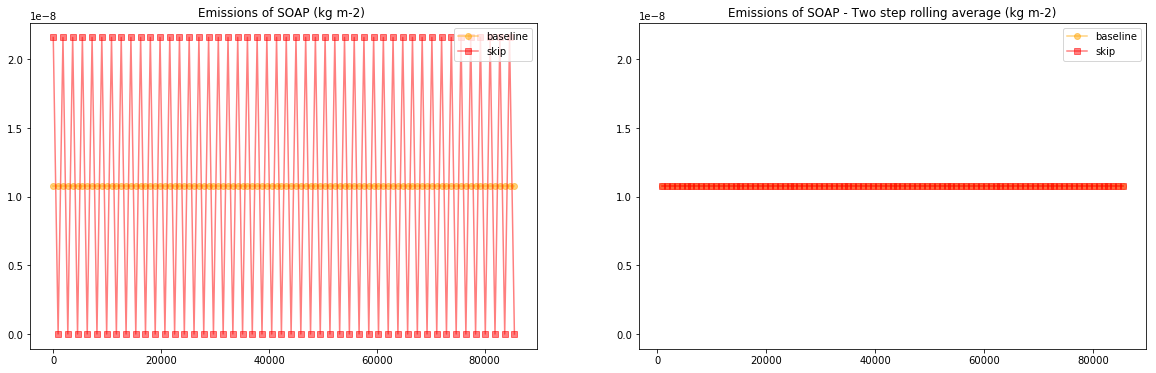

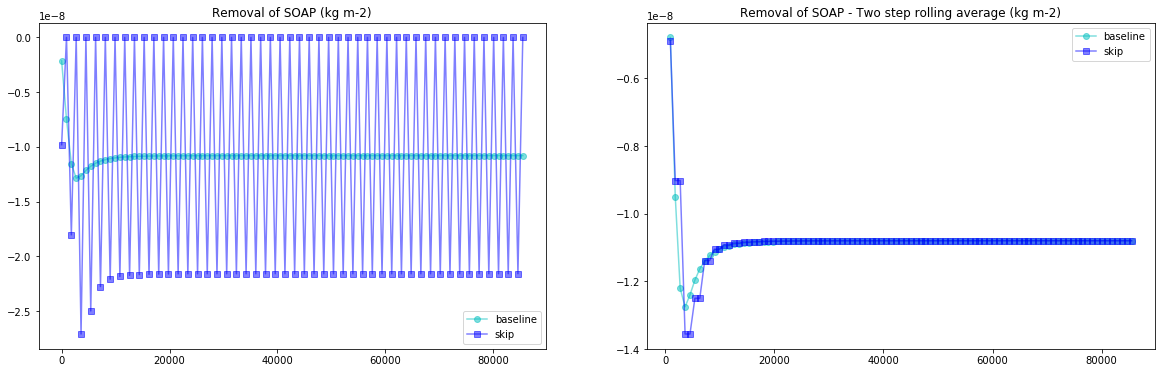

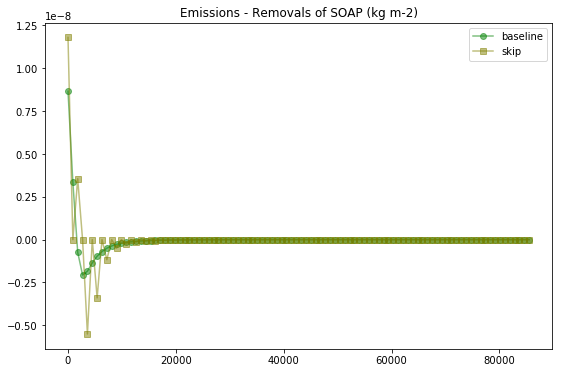

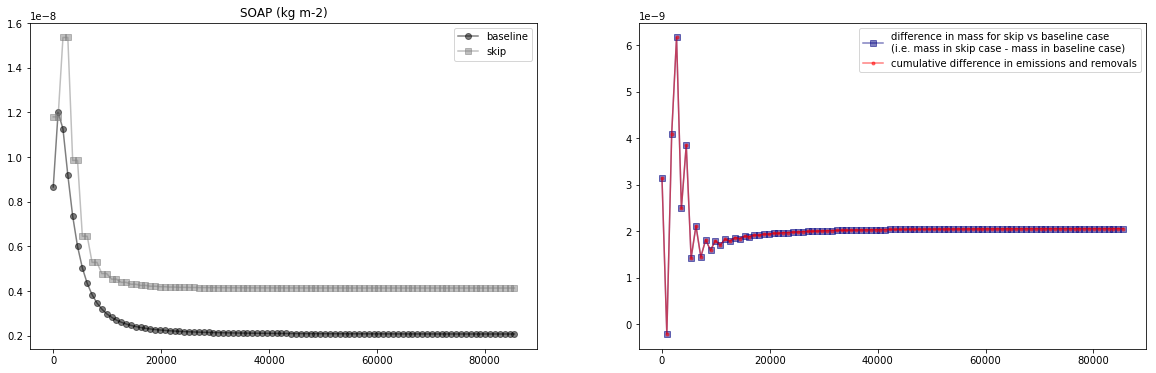

In [101]:
colours = ['k','b','m','c','g','m','orange','red','purple','olive']
markers = ['o','s','d','D','+','.','*','>','^','<']

roll=2

rem_bl  = (bl_nooc['dbug4']- bl_nooc['dbug3']).sum('level')
rem_skp = (skp_nooc['dbug4']-skp_nooc['dbug3']).sum('level') 

emis_bl  = (bl_nooc['dbug2']- bl_nooc['dbug1']).sum('level')
emis_skp = (skp_nooc['dbug2']-skp_nooc['dbug1']).sum('level') 
 
mass_bl2  = bl_nooc['dbug4'].sum('level')
mass_skp2 = skp_nooc['dbug4'].sum('level')

rem_color_bl = 'c'
rem_color_skp = 'b'

em_color_bl  = 'orange'
em_color_skp = 'r'


fig = plt.figure(figsize=(20,6))   
ax1 = plt.subplot(1,2,1)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.plot(bl_nooc.time,  emis_bl,  color=em_color_bl, marker='o', alpha=0.5, label='baseline')     
ax1.plot(skp_nooc.time, emis_skp, color=em_color_skp,marker='s', alpha=0.5, label='skip')
plt.legend()
plt.title('Emissions of SOAP (kg m-2) ')
ymin,ymax = ax1.set_ylim()

ax1 = plt.subplot(1,2,2)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.plot(bl_nooc.time,  emis_bl.rolling(time=roll).mean(dim='time'),  color=em_color_bl, marker='o', alpha=0.5, label='baseline')     
ax1.plot(skp_nooc.time, emis_skp.rolling(time=roll).mean(dim='time'), color=em_color_skp,marker='s', alpha=0.5, label='skip')
plt.legend()
plt.title('Emissions of SOAP - Two step rolling average (kg m-2)')
plt.ylim(ymin,ymax)


fig = plt.figure(figsize=(20,6))   
ax1 = plt.subplot(1,2,1)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.plot(bl_nooc.time,  rem_bl,  color=rem_color_bl, marker='o', alpha=0.5, label='baseline')     
ax1.plot(skp_nooc.time, rem_skp, color=rem_color_skp,marker='s', alpha=0.5, label='skip')
plt.legend()
plt.title('Removal of SOAP (kg m-2)')

ax1 = plt.subplot(1,2,2)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.plot(bl_nooc.time,  rem_bl.rolling(time=roll).mean(dim='time'),  color=rem_color_bl, marker='o', alpha=0.5, label='baseline')     
ax1.plot(skp_nooc.time, rem_skp.rolling(time=roll).mean(dim='time'), color=rem_color_skp,marker='s', alpha=0.5, label='skip')
plt.legend()
plt.title('Removal of SOAP - Two step rolling average (kg m-2)')


fig = plt.figure(figsize=(20,6))   
ax1 = plt.subplot(1,2,1)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.plot(bl_nooc.time,  emis_bl+rem_bl,   color='g', marker='o', alpha=0.5, label='baseline')     
ax1.plot(skp_nooc.time, emis_skp+rem_skp, color='olive',marker='s', alpha=0.5, label='skip')
plt.legend()
plt.title('Emissions - Removals of SOAP (kg m-2)')
#plt.ylim(-0.2e-11,0.02e-11)


fig = plt.figure(figsize=(20,6))  
ax1 = plt.subplot(1,2,1)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.plot(bl_nooc.time,  mass_bl2,  color='k', marker='o', alpha=0.5, label='baseline')     
ax1.plot(skp_nooc.time, mass_skp2, color='grey', marker='s', alpha=0.5, label='skip')
plt.legend()
plt.title('SOAP (kg m-2)')

ax1 = plt.subplot(1,2,2)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.plot(bl_nooc.time, mass_skp2-mass_bl2, color='navy', marker='s', alpha=0.5, label='difference in mass for skip vs baseline case\n(i.e. mass in skip case - mass in baseline case)')
ax1.plot(skp_nooc.time,((emis_skp+rem_skp)-(emis_bl+rem_bl)).cumsum() , color='r', marker='.', alpha=0.5, label='cumulative difference in emissions and removals')
plt.legend()




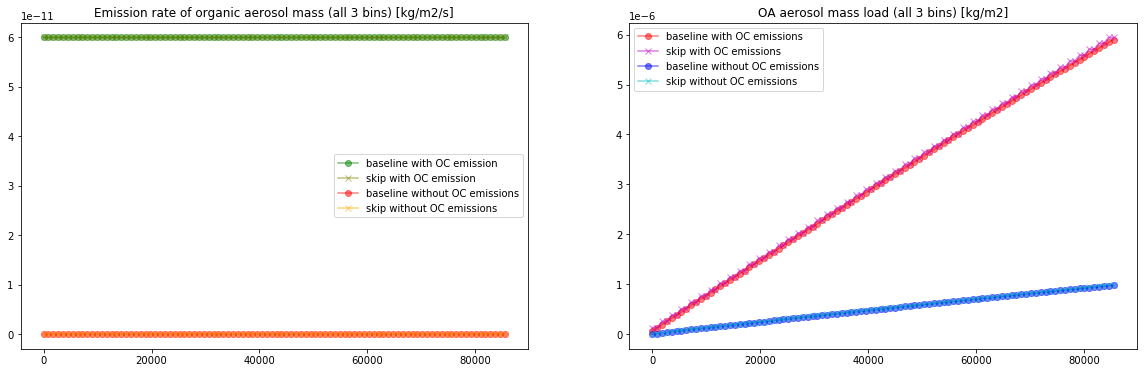

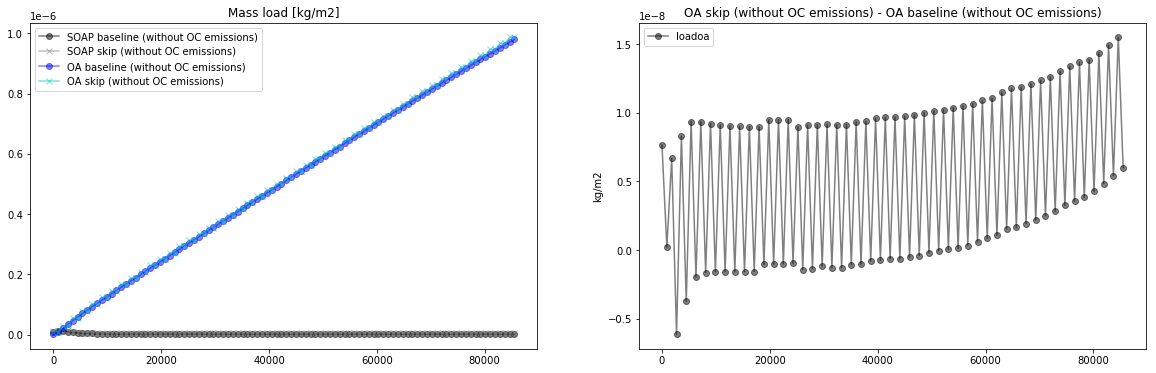

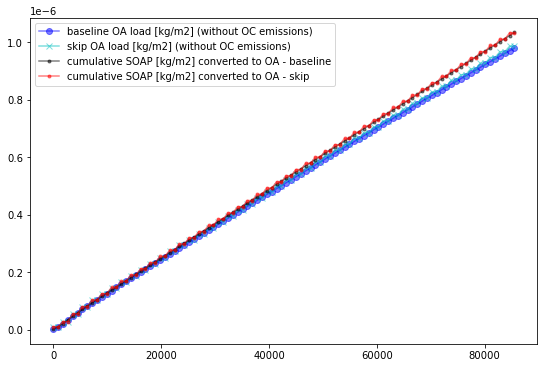

In [102]:
colours = ['k','b','m','c','g','m','orange','red','purple','olive']
markers = ['o','s','d','D','+','.','*','>','^','<']

fig = plt.figure(figsize=(20,6))   
ax1 = plt.subplot(1,2,1)


ax1.plot(bl_oc.time,   bl_oc['emioa'],   color='g',marker='o',alpha=0.5, label='baseline with OC emission') #wet dep flux calc from masses
ax1.plot(skp_oc.time,  skp_oc['emioa'],   color='olive',marker='x',alpha=0.5, label='skip with OC emission') #wet dep flux calc from masses

ax1.plot(bl_nooc.time,   bl_nooc['emioa'],   color='r',marker='o',alpha=0.5, label='baseline without OC emissions') #wet dep flux calc from masses
ax1.plot(skp_nooc.time,  skp_nooc['emioa'],   color='orange',marker='x',alpha=0.5, label='skip without OC emissions') #wet dep flux calc from masses
plt.legend()
ax1.set_title('Emission rate of organic aerosol mass (all 3 bins) [kg/m2/s]')


ax1 = plt.subplot(1,2,2)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax1.plot(bl_oc.time,   bl_oc['loadoa'],   color='r',marker='o',alpha=0.5, label='baseline with OC emissions') #wet dep flux calc from masses
ax1.plot(skp_oc.time,  skp_oc['loadoa'],   color='m',marker='x',alpha=0.5, label='skip with OC emissions') #wet dep flux calc from masses

ax1.plot(bl_nooc.time,  bl_nooc['loadoa'],   color='b',marker='o',alpha=0.5, label='baseline without OC emissions') #wet dep flux calc from masses
ax1.plot(skp_nooc.time,  skp_nooc['loadoa'],   color='c',marker='x',alpha=0.5, label='skip without OC emissions') #wet dep flux calc from masses
ax1.set_title('OA aerosol mass load (all 3 bins) [kg/m2]')

plt.legend()

fig = plt.figure(figsize=(20,6))   
ax1 = plt.subplot(1,2,1)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax1.plot(bl_nooc.time,  bl_nooc['dbug4'].sum('level'),   color='k',marker='o',alpha=0.5, label='SOAP baseline (without OC emissions)') #wet dep flux calc from masses
ax1.plot(skp_nooc.time,  skp_nooc['dbug4'].sum('level'),   color='grey',marker='x',alpha=0.5, label='SOAP skip (without OC emissions)') #wet dep flux calc from masses

ax1.plot(bl_nooc.time,  bl_nooc['loadoa'],   color='b',marker='o',alpha=0.5, label='OA baseline (without OC emissions)') 
ax1.plot(skp_nooc.time,  skp_nooc['loadoa'],   color='c',marker='x',alpha=0.5, label='OA skip (without OC emissions)')
plt.legend()
ax1.set_title('Mass load [kg/m2]')



ax1 = plt.subplot(1,2,2)
ax1.plot(bl_nooc.time,  skp_nooc['loadoa']-bl_nooc['loadoa'],   color='k',marker='o',alpha=0.5) #wet dep flux calc from masses
#ax1.plot(skp_nooc.time,  ,   color='c',marker='x',alpha=0.5, label='OA skip (without OC emissions)') #wet dep flux calc from masses
#ax1.set_yscale('log')
plt.legend()
ax1.set_ylabel('kg/m2')
ax1.set_title('OA skip (without OC emissions) - OA baseline (without OC emissions)')




rem_bl  = -1*(bl_nooc['dbug4']- bl_nooc['dbug3']).sum('level')
rem_skp = -1*(skp_nooc['dbug4']-skp_nooc['dbug3']).sum('level')  
 
fig = plt.figure(figsize=(20,6))  
ax1 = plt.subplot(1,2,1)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax1.plot(bl_nooc.time,  bl_nooc['loadoa'],   color='b',marker='o',alpha=0.5, label='baseline OA load [kg/m2] (without OC emissions)') 
ax1.plot(skp_nooc.time,  skp_nooc['loadoa'],   color='c',marker='x',alpha=0.5, label='skip OA load [kg/m2] (without OC emissions)')

ax1.plot(bl_nooc.time,(rem_bl).cumsum() , color='k', marker='.', alpha=0.5, label='cumulative SOAP [kg/m2] converted to OA - baseline')
ax1.plot(skp_nooc.time,(rem_skp).cumsum() , color='r', marker='.', alpha=0.5, label='cumulative SOAP [kg/m2] converted to OA - skip')

plt.legend()


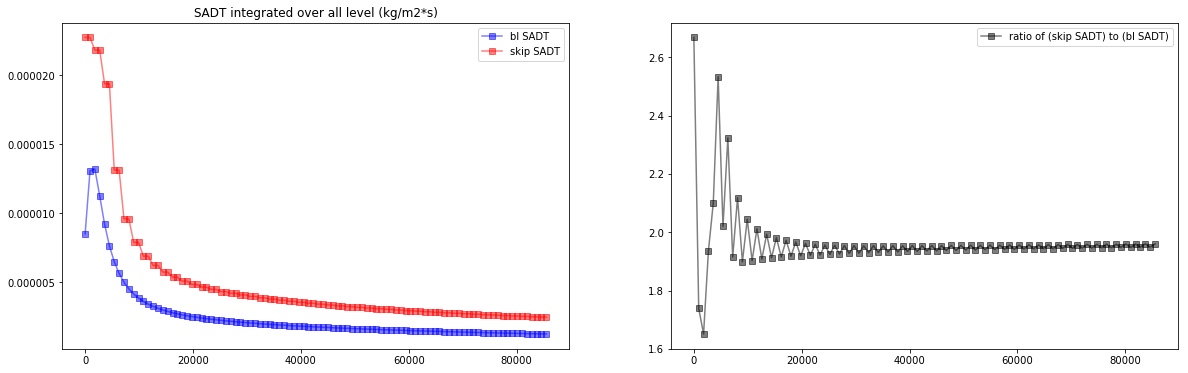

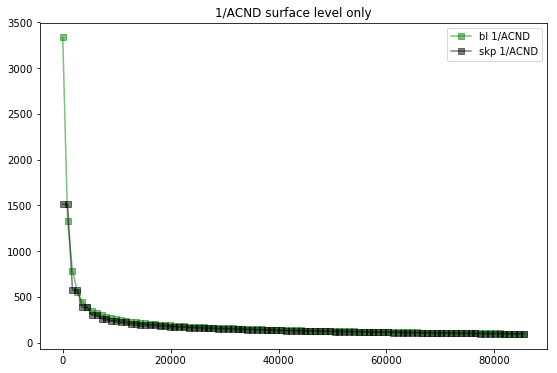

In [76]:
fig = plt.figure(figsize=(20,6))   

levels = slice(0,-1)

ax1 = plt.subplot(1,2,1)
ax1.plot(bl_nooc.time,     bl_nooc['dbug7'].sum('level'),   color='b',marker='s',alpha=0.5, label='bl SADT')
ax1.plot(skp_nooc.time,    skp_nooc['dbug7'].sum('level'),   color='r',marker='s',alpha=0.5, label='skip SADT')
ax1.set_title('SADT integrated over all level (kg/m2*s)')
plt.legend()
#ax1.set_yscale('log')


ax1 = plt.subplot(1,2,2)
ax1.plot(skp_nooc.time,    (skp_nooc['dbug7'].sum('level'))/(bl_nooc['dbug7'].sum('level')),   color='k',marker='s',alpha=0.5, label='ratio of (skip SADT) to (bl SADT)')
plt.legend()



fig = plt.figure(figsize=(20,6))   
ax1 = plt.subplot(1,2,1)
ax1.plot(bl_nooc.time,     1/bl_nooc['dbug8'].isel(level=-1),   color='g',marker='s',alpha=0.5, label='bl 1/ACND')
ax1.plot(skp_nooc.time,     1/skp_nooc['dbug8'].isel(level=-1),   color='k',marker='s',alpha=0.5, label='skp 1/ACND')

ax1.set_title('1/ACND surface level only')

#ax1.plot(skp_sadt_l.time,    1/skp_sadt_l['dbug7'].isel(level=levels).mean('level'),   color='orange',marker='s',alpha=0.5, label='skp 1/ACND')
plt.legend()

